In [2]:
import pandas as pd
import numpy as np

from transformers import pipeline

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [20, 8]

In [3]:
pd.options.display.max_columns = None

In [4]:
colors_partits = ['#F7DC6F', '#A569BD', '#F39C12', '#82E0AA', '#2471A3', '#C0392B', '#229954']

groupings = ['llengua', 'tipus']
resample = ['d', 'w', 'w-mon', 'm']

In [5]:
df_raw = pd.read_csv('../data/external/piulades_2024_03_18 - tot.csv', parse_dates=['creat'])

In [6]:
# començar el 2024
df_raw = df_raw[df_raw['creat']>='2024-01-01']

df_raw['data'] = df_raw['creat'].values.astype('datetime64[D]')

In [7]:
print(df_raw['llengua'].unique())

['ca' 'tr' 'en' 'es' 'pt' 'eu' 'hu' 'it' 'fr' 'zxx' 'lv' 'und' 'qst']


In [8]:
llengues = ['ca', 'es']

df = df_raw[df_raw['llengua'].isin(llengues)]

# 1. Sentiment

In [10]:
sentiment_pipeline = pipeline('sentiment_analysis', model='bert-base-multilingual-uncased-sentiment')

OSError: bert-base-multilingual-uncased-sentiment is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [9]:
df

,tweet_id,text,llengua,tipus,preferits,magraden,retweets,respostes,vistes,creat,client,hashtags,urls,media,media_urls,partit,data
0,'1769681071916953887',🍒 COMUNA DE PARÍS\n\n#TalDiaComAvui de 1871 s...,ca,Retweet,0,26,15,0,2377.0,2024-03-18 12:03:41,"<a href=""https://mobile.twitter.com"" rel=""nofo...",#TalDiaComAvui,NaN,photo,https://pbs.twimg.com/media/GI8rYMyWIAAPNgP.jpg,cup,2024-03-18
1,'1769674784646869127',🔸Lamentem el crim de la treballadora del CP Ma...,ca,Tweet,1,72,17,91,20308.0,2024-03-18 11:38:42,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,cup,2024-03-18
2,'1769422825750704520',D'aquí poc el PSC s'omplirà la boca de la defe...,ca,Retweet,0,79,60,1,7720.0,2024-03-17 18:57:30,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,cup,2024-03-17
3,'1769457554910802430',"""No podran res davant d'un poble unit, alegre ...",ca,Tweet,4,145,55,2,10644.0,2024-03-17 21:15:30,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,photo,https://pbs.twimg.com/media/GI5dRu6XkAEnmh7.jpg,cup,2024-03-17
4,'1769375348955709791',Per rellançar la precarietat al Camp.\nPer con...,ca,Retweet,1,71,24,5,5762.0,2024-03-17 15:48:51,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,cup,2024-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,'1751933820863918386',"▶ #President @perearagones: ""Farem de l'@hospi...",ca,Retweet,2,68,29,65,16825.0,2024-01-29 12:42:26,"<a href=""https://www.hootsuite.com"" rel=""nofol...",#President,NaN,video,https://video.twimg.com/ext_tw_video/175193372...,erc,2024-01-29
6802,'1751943795850010914',"🎥 ""Demostrem que tots els avenços que planteja...",ca,Tweet,1,71,38,32,3960.0,2024-01-29 13:22:05,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,video,https://video.twimg.com/ext_tw_video/175194158...,erc,2024-01-29
6803,'1751941443629826254',"🎥 @raquelsans en roda de premsa: ""Demà s'aprov...",ca,Tweet,1,52,26,61,5253.0,2024-01-29 13:12:44,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,video,https://video.twimg.com/ext_tw_video/175193970...,erc,2024-01-29
6804,'1751916784058355798',Per què era necessari un Pla d’Acció contra la...,ca,Retweet,2,43,18,101,8587.0,2024-01-29 11:34:45,"<a href=""http://twitter.com/download/iphone"" r...",#PressióEstètica,https://educa.barcelona/2024/01/29/agenda-dels...,NaN,NaN,erc,2024-01-29


In [10]:
_ = df.groupby(['data', 'partit'])['tweet_id'].count().reset_index(name='piulades')
_.groupby('partit')['piulades'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
partit,,,,,,,,
ecp,54.0,18.259259,11.731566,2.0,8.25,15.0,26.00,48.0
erc,51.0,17.882353,8.396778,1.0,12.00,17.0,24.00,34.0
jxc,56.0,17.071429,10.407789,1.0,9.00,16.0,23.25,44.0
psc,71.0,13.774648,7.514172,2.0,8.00,14.0,18.00,35.0
cup,70.0,13.100000,7.558755,2.0,7.00,12.0,17.00,35.0
vox,66.0,4.833333,4.108465,1.0,2.00,4.0,7.00,23.0
pp,66.0,3.015152,1.723078,1.0,2.00,3.0,4.00,8.0


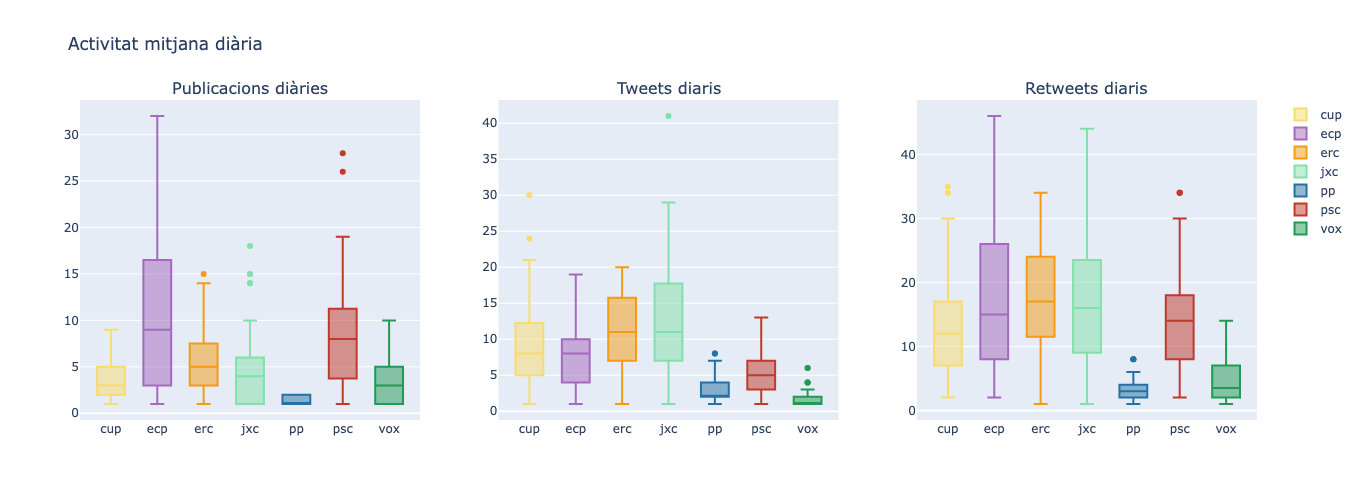

In [82]:
df.loc[: , 'data'] = df['creat'].values.astype('datetime64[D]')
daily_tweets_by_partit = df.groupby(['data', 'partit', 'tipus'])['tweet_id'].nunique().reset_index()

# Define a consistent color palette for partits
partits = sorted(df['partit'].unique())
colors = sns.color_palette(colors_partits, len(partits)).as_hex()  # Using Seaborn to generate colors
color_map = dict(zip(partits, colors))

fig = make_subplots(rows=1, cols=3, subplot_titles=("Publicacions diàries", "Tweets diaris", "Retweets diaris"))

# Helper function to add traces to avoid repetition
def add_traces(partit_data, row, col, partit, showlegend):
    fig.add_trace(
        go.Box(y=partit_data['tweet_id'], name=partit, marker_color=color_map[partit], showlegend=showlegend, width=0.6),
        row=row, col=col
    )

# Plotting Tweets and Retweets
for partit in partits:
    # Plotting the sum of all types
    summed_data = daily_tweets_by_partit[daily_tweets_by_partit['partit'] == partit].groupby(['data', 'partit'])['tweet_id'].sum().reset_index()
    add_traces(summed_data, 1, 3, partit, False)
    
    for i, typus in enumerate(['Tweet', 'Retweet']):
        filtered_data = daily_tweets_by_partit[(daily_tweets_by_partit['partit'] == partit) & (daily_tweets_by_partit['tipus'] == typus)]
        add_traces(filtered_data, 1, i+1, partit, showlegend=(i==0))

fig.update_layout(height=500, width=1300, title_text="Activitat mitjana diària", boxmode='group')
fig.show()

# 2. Llengües

In [76]:
# llengües dels tweets
tweet_counts = df.groupby(['partit', 'llengua'])['tweet_id'].nunique().reset_index(name='counts')
total_counts_by_partit = tweet_counts.groupby('partit')['counts'].sum().reset_index(name='total_counts')

# Merge the total counts back into the original dataframe
tweet_counts = tweet_counts.merge(total_counts_by_partit, on='partit')

# Calculate the percentage of each llengua within each partit
tweet_counts['percentage'] = (tweet_counts['counts'] / tweet_counts['total_counts']) * 100

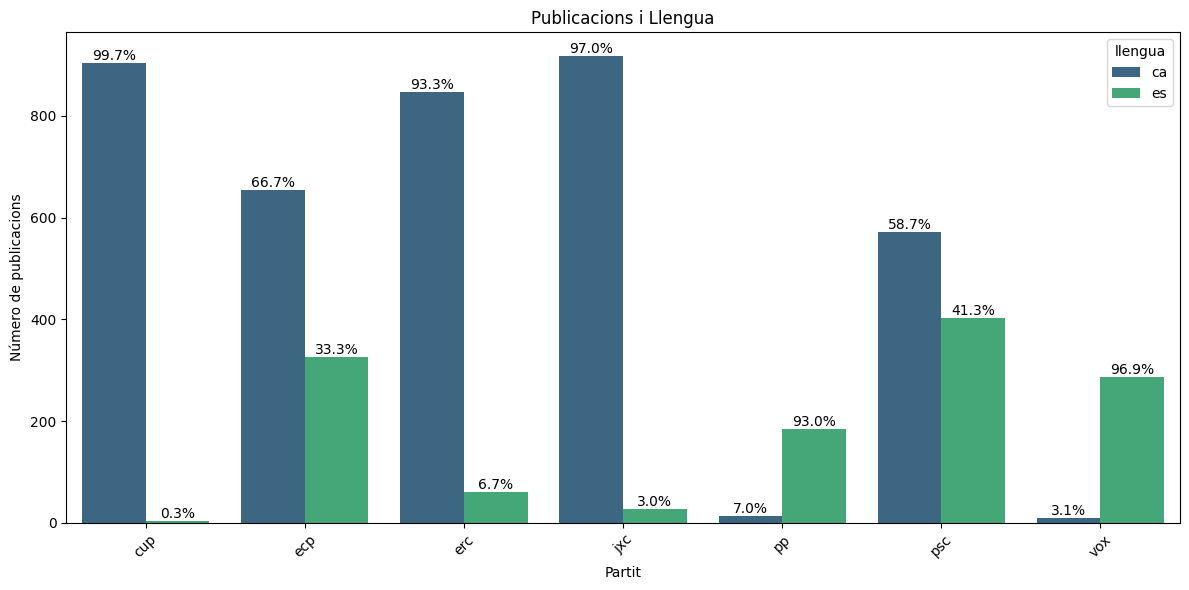

In [79]:
plt.figure(figsize=(12, 6)) 
ax = sns.barplot(data=tweet_counts, x='partit', y='counts', hue='llengua', palette='viridis')

# Iterate through the bars and add percentage text
for bar in ax.patches:
    # The current bar represents the count for a particular language and party
    height = bar.get_height()  # The height of the bar is the count
    partit = tweet_counts.loc[tweet_counts['counts'] == height, 'partit'].values[0]
    percentage = tweet_counts.loc[(tweet_counts['partit'] == partit) & (tweet_counts['counts'] == height), 'percentage'].values[0]
    
    # Format and position the text on top of the bar
    ax.text(bar.get_x() + bar.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=45)  
plt.title('Publicacions i Llengua')
plt.xlabel('Partit')
plt.ylabel('Número de publicacions')
plt.tight_layout() 
plt.show()

### 